# **Clustering analysis**

In this notebook we explore some techniques for clustering papers in our data set based on their titles. First we test some vectorization (embedding) techniques, and then we move forward with dimensionality reduction and clustering of the data.

**Steps:**

1. **Vectorizer:** SentenceBERT embeddings.

2. **Dimensionality reduction for visualization:** PCA, UMAP, t-SNE.

3. **Clustering method:** KMeans, Agglomerative dendogram.

In [ ]:
# Clustering analysis module in repository
import clustering_analysis as ca
import pandas as pd

# Load Data

In [ ]:
# Load data (follow instruction in README.md to access the dataset)
df = pd.read_csv('../data/cleaned_dataset.csv')

In [ ]:
df

,Professor,Publication Year,Authors,Abstract
0,Abbas Firoozabadi,2024,Ding B.; Kantzas A.; Firoozabadi A.,CO2 storage in saline aquifers may contribute ...
1,Abbas Firoozabadi,2024,Chávez-Miyauchi T.E.; Kar T.; Ayirala S.; Yous...,Flooding with low salinity water (LSW) may inc...
2,Abbas Firoozabadi,2024,Kobayashi K.; Firoozabadi A.,Quartz is ubiquitous in subsurface formations....
3,Abbas Firoozabadi,2024,Jex M.; Mikyška J.; Firoozabadi A.,Successful large-scale compositional reservoir...
4,Abbas Firoozabadi,2024,Feng Y.; Firoozabadi A.,The wrong Supplementary file was originally pu...
...,...,...,...,...
19913,Z. Maria Oden,1998,ZM Oden and DM Selvitelli,The local interpretation of microfinite elemen...
19914,Z. Maria Oden,1997,Z Maria Oden and David M Selvitelli,Maintaining structural integrity is an importa...
19915,Z. Maria Oden,1993,ZM Oden and RT Hart,A comprehensive extension of the ordinary 2-Hi...
19916,Z. Maria Oden,1993,ZM Oden and RT Hart and DB Burr,This study compares the effect of eight postul...


# **Vectorization**

For this exploration, we will cluster the papers in the dataset based on their titles and we will be using Sentence-BERT (SBERT) for the embeddings of the text data.

SBERT is specifically designed to generate sentence or short-text embeddings that capture the semantic meaning of a sentence. Unlike traditional models like Word2Vec or TF-IDF, which focus on individual words or term frequencies, SBERT encodes the meaning of the entire sentence.

SBERT is also fine-tuned for tasks that require sentence-level understanding, like similarity tasks, paraphrase detection, and clustering. This makes SBERT embeddings highly relevant for tasks where the relationship between entire sentences (titles in this case) is important. Since SBERT directly generates embeddings suitable for similarity comparisons and clustering tasks, there is no need to perform additional opperations, like cosine similarity over token embeddings.

In [ ]:
# Step 1: Use Sentence-BERT for embeddings with 'Abstract' column
# This function uses GPUs for faster computation
embeddings = ca.generate_embeddings(df, text_column='Abstract', model_name='all-MiniLM-L6-v2')

Using device: cuda


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

# **Dimesionality Reduction**

Before trying any clustering algorithms, first we need to evaluate dimensionality reduction techniques for visualization. In this case we compare PCA, UMAP, and t-SNE. We will look for the representation which more clearly separates the data.

**PCA:** Captures the linear relationships and is fast to compute, but may miss non-linear patterns.

**UMAP:** Captures both local and global structure, often creating well-separated clusters in the lower-dimensional space.

**t-SNE:** Focuses on local relationships and often provides clearer cluster separation, though it can distort the global structure.


By comparing the visualizations side by side, we can see how each technique handles the data and choose the best one.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


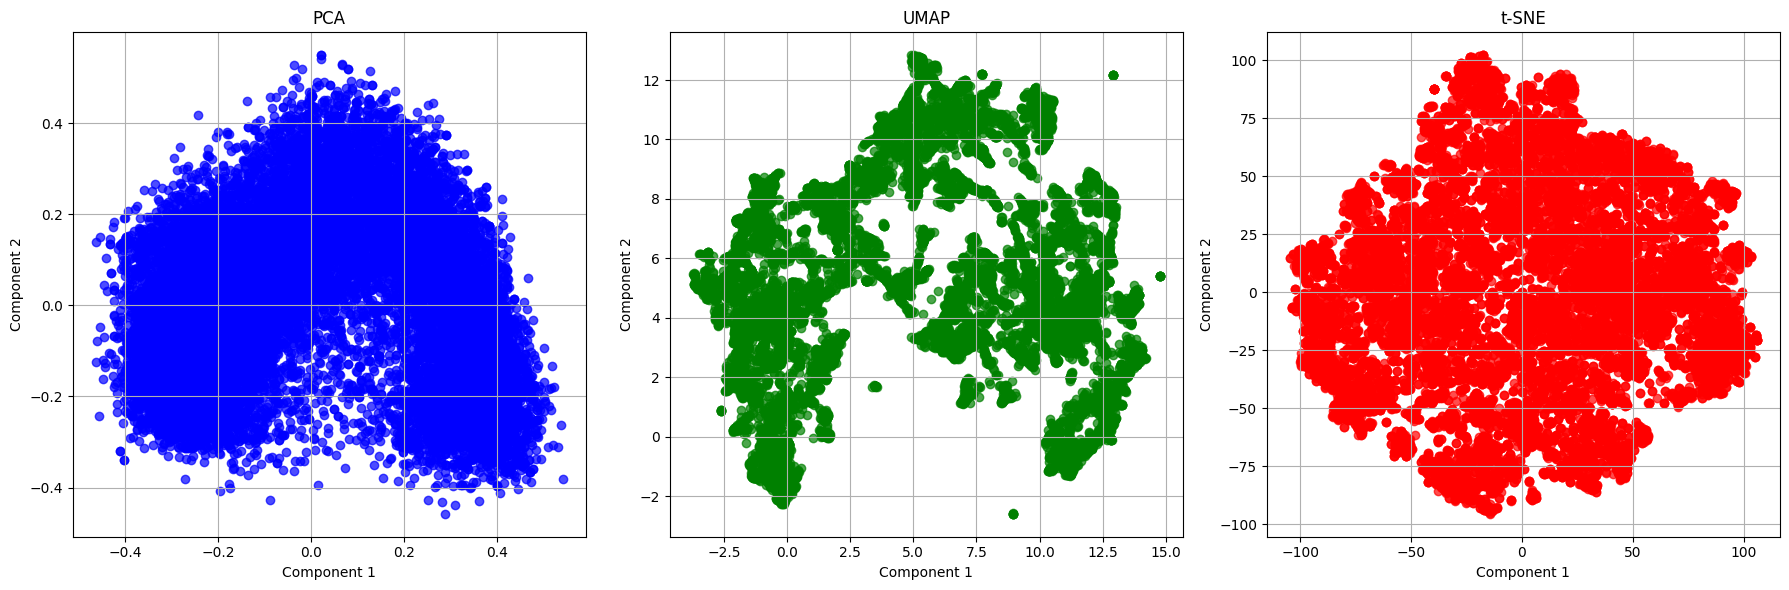

In [ ]:
# Using the array of embeddings
X_pca = ca.fit_pca(embeddings)
X_umap = ca.fit_umap(embeddings)
X_tsne = ca.fit_tsne(embeddings)

# Plot the results
ca.plot_dimensionality_reduction(X_pca, X_umap, X_tsne)

The results above seem to indicate that UMAP does a better work at generating a segmented representation of the dataset, so we will keep this technique for future visualizations.

# **Clustering**

Based on the results of the previous section, we are going to use UMAP for clustering visualizations.

## KMeans

Silhouette Score: 0.4317


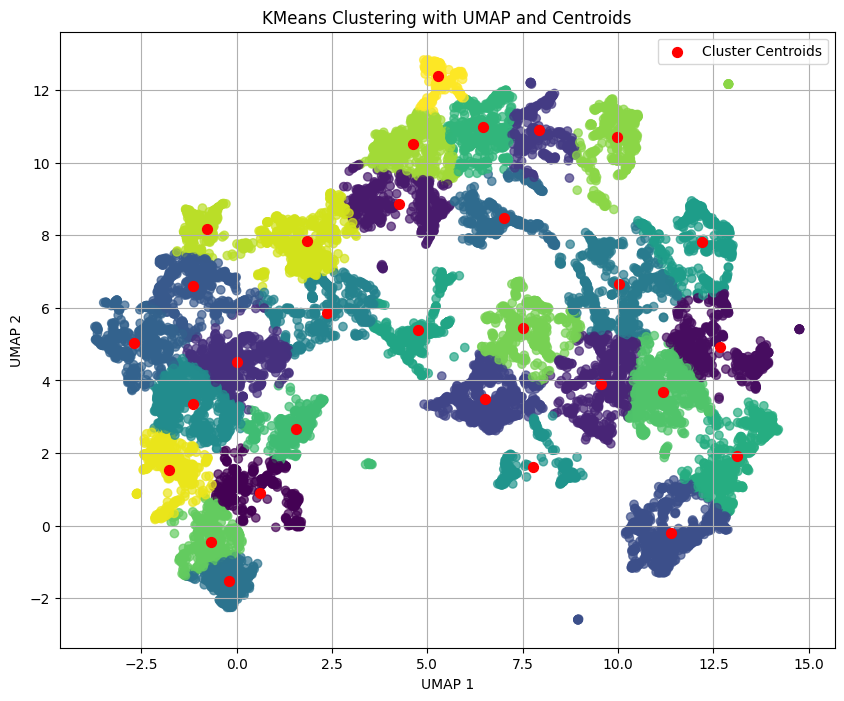

In [ ]:
# Using X_umap (UMAP-reduced data)
kmeans_labels, silhouette_avg = ca.perform_kmeans_clustering(X_umap)

In [ ]:
# Step 6: Check which documents are in each cluster
df_clustered = df.copy()
# Add the cluster labels to the dataframe
df_clustered['Cluster_KMeans'] = kmeans_labels

## Agglomerative Clustering

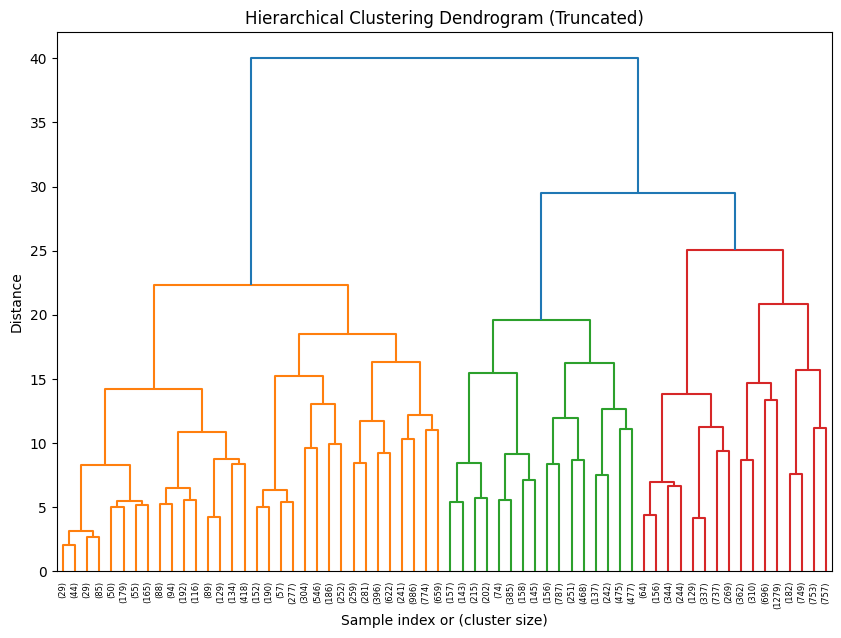

In [ ]:
# Using the array of embeddings
ca.plot_hierarchical_clustering_dendrogram(embeddings)

In [ ]:
# Cut the dendogram to create clusters and save the labels
labels = ca.perform_agglomerative_clustering(embeddings)
df_clustered['Cluster_Agglomerative'] = labels

# Cluster analysis

In [ ]:
df_clustered.to_csv("cleaned_cataset_clustered.csv")

In [ ]:
df_clustered[df_clustered['Cluster_KMeans']== 0]

,Professor,Publication Year,Authors,Abstract,Cluster_KMeans,Cluster_Agglomerative
547,Alessandro Alabastri,2023,Tay F.; Mojibpour A.; Sanders S.; Liang S.; Xu...,We have demonstrated ultrastrong and superstro...,0,2
620,Alessandro Alabastri,2015,Buencuerpo J.; Llorens J.M.; Zilio P.; Raja W....,A series of photonic crystal structures are op...,0,2
1279,Ashok Veeraraghavan,2020,Lin N.C.; Hassan S.; Zhao X.; Veeraraghavan A....,We present a method to passively edge couple m...,0,2
2511,Boris Yakobson,1997,Gruzdev V.E.; Libenson M.N.; Martsinovski G.A....,The nature of surface optical breakdown is gen...,0,11
2513,Boris Yakobson,1996,Boykin P.O.; Paesler Michael A.; Yakobson Bori...,We use a ray tracing technique in order to ana...,0,11
...,...,...,...,...,...,...
19866,Yuji Zhao,2011,Zhao Y.; Tanaka S.; Pan C.-C.; Fujito K.; Feez...,We report a high-power blue light-emitting dio...,0,2
19867,Yuji Zhao,2011,Huang C.-Y.; Yan Q.; Zhao Y.; Fujito K.; Feeze...,We report the effects of Mg doping in the barr...,0,2
19868,Yuji Zhao,2010,Zhao Y.; Sonada J.; Koslow I.; Pan C.-C.; Ohta...,The device structures of semipolar (101̄11̄1) ...,0,2
19869,Yuji Zhao,2010,Zhao Y.; Sonoda J.; Pan C.-C.; Brinkley S.; Ko...,The first 30-mW-class semipolar blue light-emi...,0,2
